# Exploring neural network transformations

What is it a NN does? This notebook is based on the excellent
article: [Neural Networks, Manifolds and Topology](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/) by Christopher Olah.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [2]:
from ipywidgets import interact

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [3]:
# 1D data along the line, A=[−1/3,1/3], B=[−1,−2/3]∪[2/3,1]
X = np.linspace(-1, 1, 1800)
y = np.zeros_like(X)
y[(-1/3<X) & (X<1/3)] = 1
X = X.reshape(1800, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=900, random_state=2)

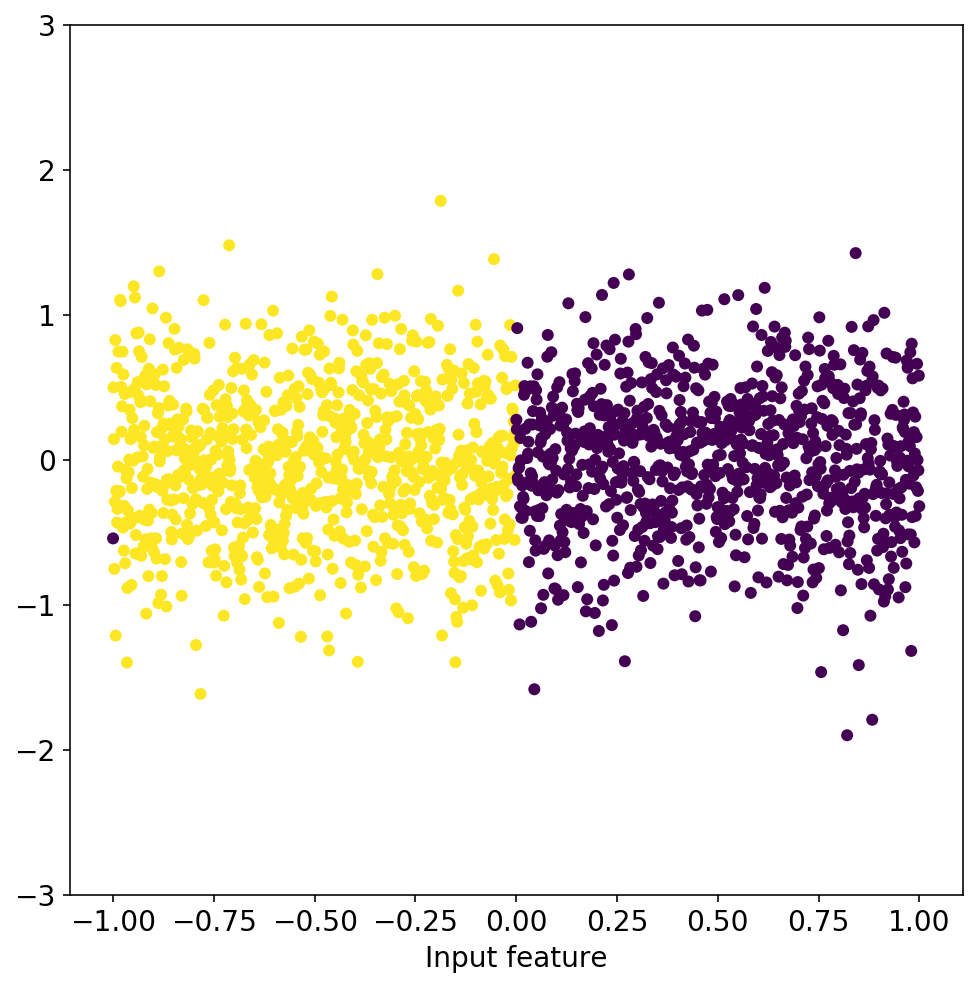

In [4]:
# add some scatter to spread points out, purely for display purposes
# the real data is only one dimensional
plt.scatter(X, np.random.normal(scale=0.5, size=1800), c=y, lw=0.)
plt.xlabel("Input feature")
plt.ylim([-3,3]);

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=400,
                    solver='sgd', verbose=0, random_state=1,
                    learning_rate_init=0.02, activation='tanh')


def compute_activations(mlp):
    # fit it first to populate the various attributes ...
    mlp.fit(X_train, y_train)

    # re-implement the forward pass logic from within the MLP class
    # so we can access the intermediate activations
    hidden_layer_sizes = mlp.hidden_layer_sizes
    hidden_layer_sizes = list(hidden_layer_sizes)
    layer_units = [X_test.shape[1]] + hidden_layer_sizes + [mlp.n_outputs_]

    activations = [X_test]
    for i in range(mlp.n_layers_ - 1):
        activations.append(np.empty((X.shape[0],
                                     layer_units[i + 1])))
    # forward pass
    mlp._forward_pass(activations)
    return activations

In [6]:
def plot_activations(activations, n_points=100):
    np.random.seed(123)
    #activations = activations[:n_points]
    hidden_layer = activations[-2]
    y_pred = activations[-1]

    fig, ax = plt.subplots(1, 3, figsize=(12,4))

    # input
    ax[0].scatter(X_test[:n_points], np.random.normal(scale=0.5, size=n_points),
                  c=y_test[:n_points], lw=0.)
    ax[0].set_xlabel("Input feature")
    ax[0].set_ylabel('Dummy')
    ax[0].set_ylim([-3,3]);

    # hidden layer
    ax[1].scatter(hidden_layer[:n_points,0], hidden_layer[:n_points,1],
                  c=y_test[:n_points], lw=0)
    ax[1].set_xlabel('neuron 1')
    ax[1].set_ylabel('neuron 2')
    #ax[1].set_xlim([-1, 1])
    #ax[1].set_ylim([-1, 1])

    # output layer
    ax[2].scatter(activations[-1][:n_points], np.random.normal(scale=0.5, size=n_points),
                  c=y_test[:n_points], lw=0)
    ax[2].set_xlabel('network output')
    ax[2].set_ylabel('dummy')
    ax[2].set_xlim([0,1])
    ax[2].set_ylim([-3,3]);

    plt.tight_layout();
    plt.show()

## Demo

With two nodes in the hidden layer the network can transform the 1D problem into a 2D problem. It then uses the non-linearity to deform the space. Without the non-linearity it does not get very far. In this case the ReLu also does not get very far.

In [8]:
def run(iteration=1, activation='tanh', n_points=100):
    mlp.set_params(max_iter=iteration, activation=activation)

    activations4 = compute_activations(mlp)
    plot_activations(activations4, n_points=n_points)
    
interact(run, iteration=(1, 150, 10),
         activation=['tanh', 'identity', 'relu'],
         n_points=(10,200, 10));

if the activation is linear it is not possible to separate the two sets of point with one line, but if we use a non linear activation (e.g. tanh) it is possible to change the rappresentation in something which is separable with a single line.
Which of this activtion function works best ? We should try different functions or search in literature, hard to say a priori. 